1. Data Description and Analysis


a.)**Dataset Motivation:**    
> In an increasingly connected and mobile world, air travel is a vital contribution to the world's efficiency. Individuals and businesses depend on a seamless experience. Delays can cause significant financial consequences due the interconnected nature of airport networks. Southwest Airlines' recent troubles are an example of this and affected 2 million passengers while costing the company over $1 billion. I have chosen this data set to provide valuable insights into the contributing reasons to flight disruptions, uncover areas of optimization for airlines, and reveal information to enhance a customer's maximum chance of a smooth flight experience.







b.) **Objective:**
> The objective of this study is to create a predictive model to identify flights that are likely to have disruptions. I will explore the relationships between features such as airport data, airline companies, weather, the cyclical patterns of time of day, day of the week, and months, and their role in how likely a flight is to be delayed or cancelled. 


For this prediction problem I will use **three approaches:**

1.   A multivariate regression problem to predict the exact time delay of a flight.
2.   A classification problem to predict if a flight will be cancelled or not. I will use Random Forests Classifier, KNN classification, and Logistic Regression to classify, then compare each algorithm's results.
3.   An unsupervised clustering problem. I will use a DBSCAN approach to analyze what seperates the clusters and what is similar to the clusters.


c.) **Description:**
> This dataset is comprised of 1,936,758 flights in the US in 2008. The dats comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics(BTS).

Here is a breakdown of the features:


1. Year 2008
2. Month 1-12
3. DayofMonth 1-31
4. DayOfWeek 1 (Monday) - 7 (Sunday)
5. DepTime actual departure time (local, hhmm)
6. CRSDepTime scheduled departure time (local, hhmm)
7. ArrTime actual arrival time (local, hhmm)
8. CRSArrTime scheduled arrival time (local, hhmm)
9. UniqueCarrier unique carrier code
10. FlightNum flight number
11. TailNum plane tail number: aircraft registration, unique aircraft identifier
12. ActualElapsedTime in minutes
13. CRSElapsedTime in minutes
14. AirTime in minutes
15. ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS). Early arrivals show negative numbers, in minutes
16. DepDelay Difference in minutes between scheduled and actual departure time.
Early departures show negative numbers, in minutes
17. Origin origin IATA airport code
18. Dest destination IATA airport code
19. Distance between airports in miles
20. TaxiIn Wheels down and arrival at the destination airport gate, in minutes
21. TaxiOut Wheels down and arrival at the destination airport gate, in minutes
22. Cancelled *was the flight cancelled
23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted 1 = yes, 0 = no
25. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
28. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.





### Data Pre Processing

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in dataset file
df = pd.read_csv("C:\\Users\sewar\Documents\Paul\Computer Science\CS4120\DelayedFlights.csv\DelayedFlights.csv")
df.head()

# Drop index and year column
Flights = df.drop(df.columns[0], axis = 1)
Flights = Flights.drop(Flights.columns[0], axis = 1)


# Display the dataset size and columns
print(Flights.head())
print(Flights.shape)

In [2]:
# Display the dataset feature variable types and null values
tab_info=pd.DataFrame(Flights.dtypes).T.rename(index={0:'Variable Type'})
tab_info=tab_info.append(pd.DataFrame(Flights.isnull().sum()).T.rename(index={0:'Null Values'}))
tab_info = tab_info.append(pd.DataFrame(Flights.isnull().sum()/Flights.shape[0]*100).T.rename(index={0:'Null Value (%)'}))
tab_info


C:\Users\sewar\AppData\Local\Temp\ipykernel_536\1363834971.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(Flights.isnull().sum()).T.rename(index={0:'Null Values'}))
C:\Users\sewar\AppData\Local\Temp\ipykernel_536\1363834971.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(Flights.isnull().sum()/Flights.shape[0]*100).T.rename(index={0:'Null Value (%)'}))


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Variable Type,int64,int64,int64,float64,int64,float64,int64,object,int64,object,...,float64,float64,int64,object,int64,float64,float64,float64,float64,float64
Null Values,0,0,0,0,0,7110,0,0,0,5,...,7110,455,0,0,0,689270,689270,689270,689270,689270
Null Value (%),0.0,0.0,0.0,0.0,0.0,0.367108,0.0,0.0,0.0,0.000258,...,0.367108,0.023493,0.0,0.0,0.0,35.588855,35.588855,35.588855,35.588855,35.588855


In [3]:
# Display the dataset feature summary statistics
Flights.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


# Cleaning the Data
### Missing Values

In [4]:
# Missing values imputation using Interpolation. I used linear interpolation to practice keeping 
# computation costs low and this dataset has 30 features which is not that high-dimensional.

# The following features are all discrete values with linear relationships amongst correlated time features.
Flights['ArrTime']=Flights['ArrTime'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['ActualElapsedTime']=Flights['ActualElapsedTime'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['CRSElapsedTime']=Flights['CRSElapsedTime'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['AirTime']=Flights['AirTime'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['ArrDelay']=Flights['ArrDelay'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['TaxiIn']=Flights['TaxiIn'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['TaxiOut']=Flights['TaxiOut'].interpolate(method='linear',limit_direction='both',axis=0)
Flights['TaxiOut']=Flights['TaxiOut'].interpolate(method='linear',limit_direction='both',axis=0)

# Only five null instances of TailNum can be easily removed with losing much information
Flights = Flights.dropna(subset=['TailNum'])

The missing values in Carrier, Weather, NAS, Security, and LateAircraft delays make up over 1/3 of the entire dataset so I cannot simply ommit them. I also cannot impute these values if this is a value I am trying to predict. I will seperate my data with respect to each approach.



*   For regression to predict these discrete values I will need to discard these missing value instances. This will still leave over 1 million flights which is still a significant amount of information for regression. 
*   For classification and clustering I am not trying to predict these discrete values as the target so I can interpolate these values. Again, I will use interpolation with method='linear' to impute these features.



In [5]:
# Create seperate dataset for regression with missing target variables ommitted.
Flights_reg = Flights.dropna(subset=['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay', 'LateAircraftDelay'])
print(Flights_reg.shape)
print(Flights_reg.isna().sum())

# Interpolation with linear method
Flights_LinImpute = Flights
Flights_LinImpute['CarrierDelay']=Flights_LinImpute['CarrierDelay'].interpolate(method='linear',limit_direction='both',axis=0)
Flights_LinImpute['WeatherDelay']=Flights_LinImpute['WeatherDelay'].interpolate(method='linear',limit_direction='both',axis=0)
Flights_LinImpute['NASDelay']=Flights_LinImpute['NASDelay'].interpolate(method='linear',limit_direction='both',axis=0)
Flights_LinImpute['SecurityDelay']=Flights_LinImpute['SecurityDelay'].interpolate(method='linear',limit_direction='both',axis=0)
Flights_LinImpute['LateAircraftDelay']=Flights_LinImpute['LateAircraftDelay'].interpolate(method='linear',limit_direction='both',axis=0)

# Recheck there are no remaining null values.
print(Flights_LinImpute.shape)
print(Flights_LinImpute.isna().sum())

(1247486, 28)
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64
(1936753, 28)
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay        

# Visualizing the Data


C:\Users\sewar\AppData\Local\Temp\ipykernel_536\654991759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Flights_reg.corr().round(2)


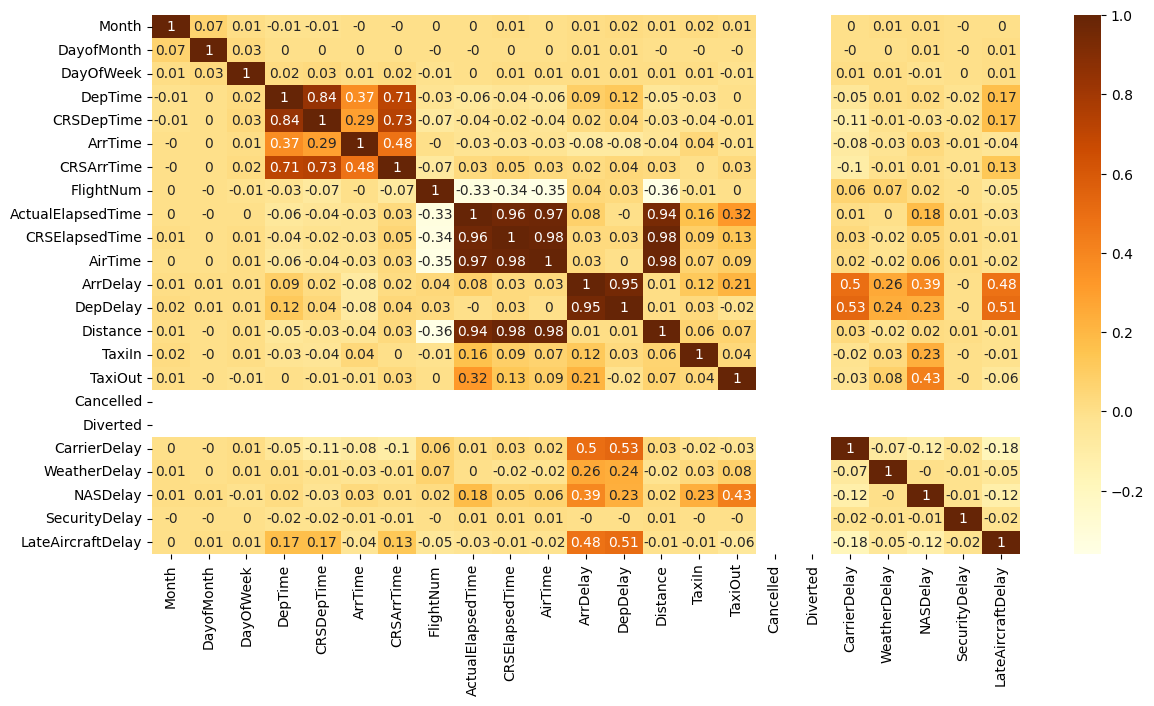

In [6]:
# Calculate and visualize correlation matrix
corr_matrix = Flights_reg.corr().round(2)
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')


plt.show()

<AxesSubplot: xlabel='Month', ylabel='WeatherDelay'>

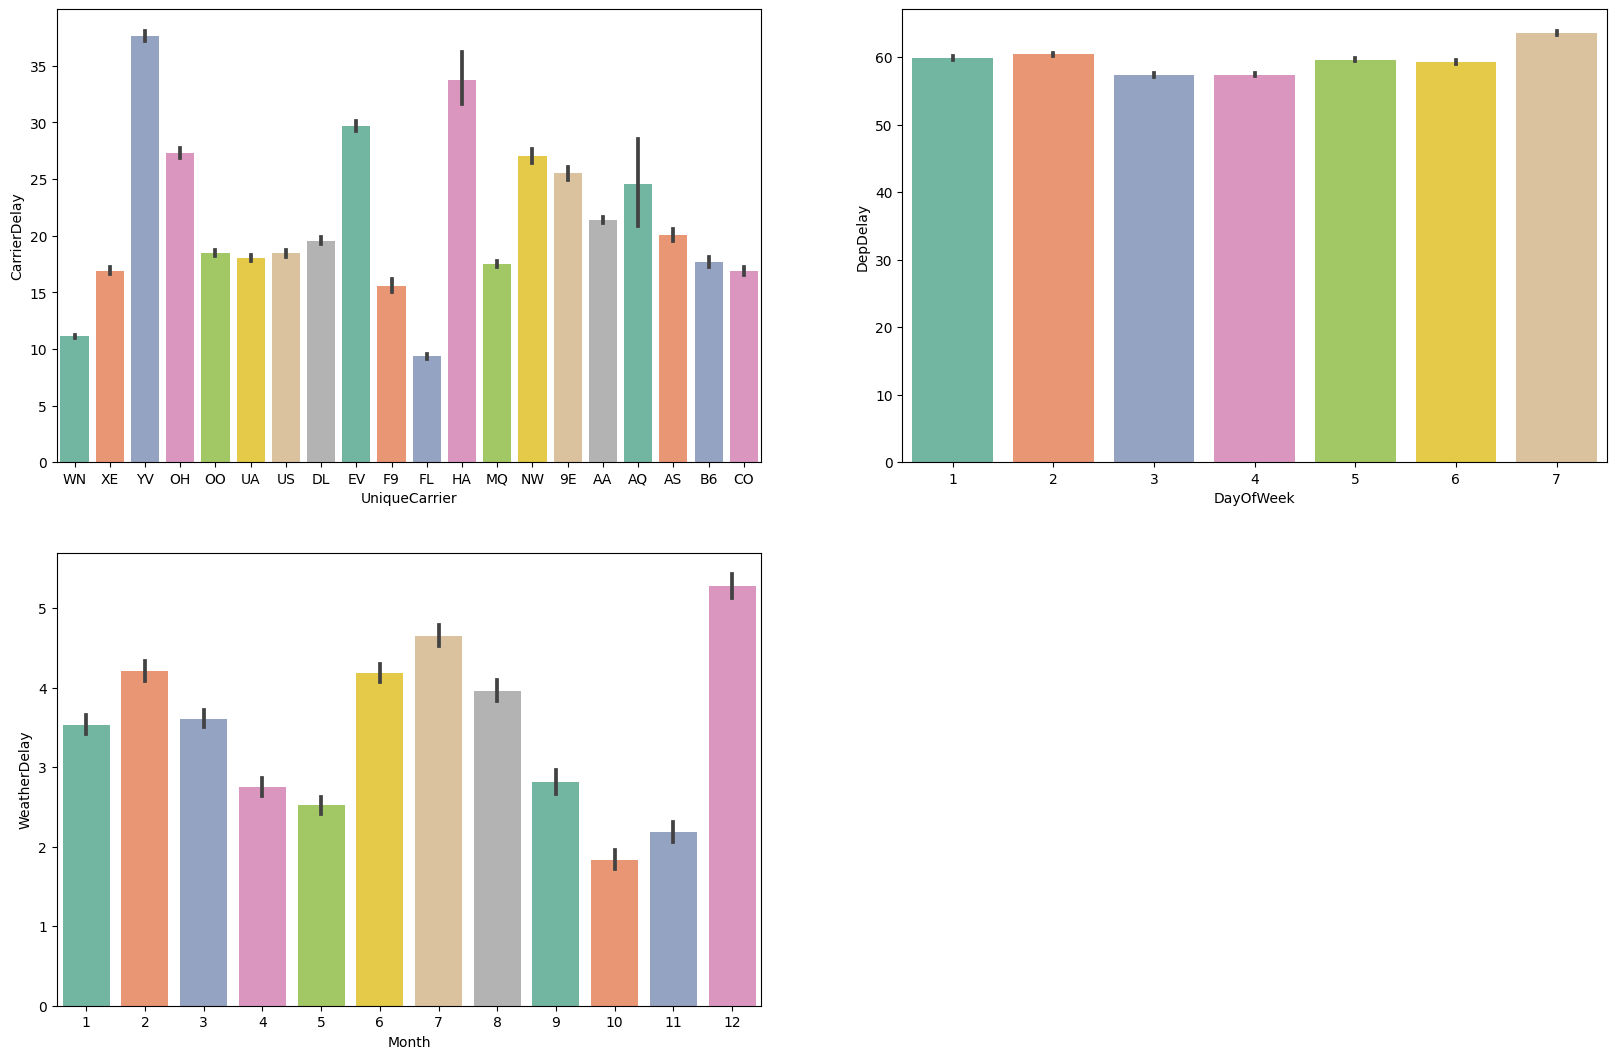

In [7]:
# Visualize the relations of delay counts certain features.
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.barplot(x='UniqueCarrier', y='CarrierDelay', data=Flights_reg, palette='Set2')

plt.subplot(3,2,2)
sns.barplot(x='DayOfWeek', y='DepDelay', data=Flights_reg, palette='Set2')

plt.subplot(3,2,3)
sns.barplot(x='Month', y='WeatherDelay', data=Flights_reg, palette='Set2')

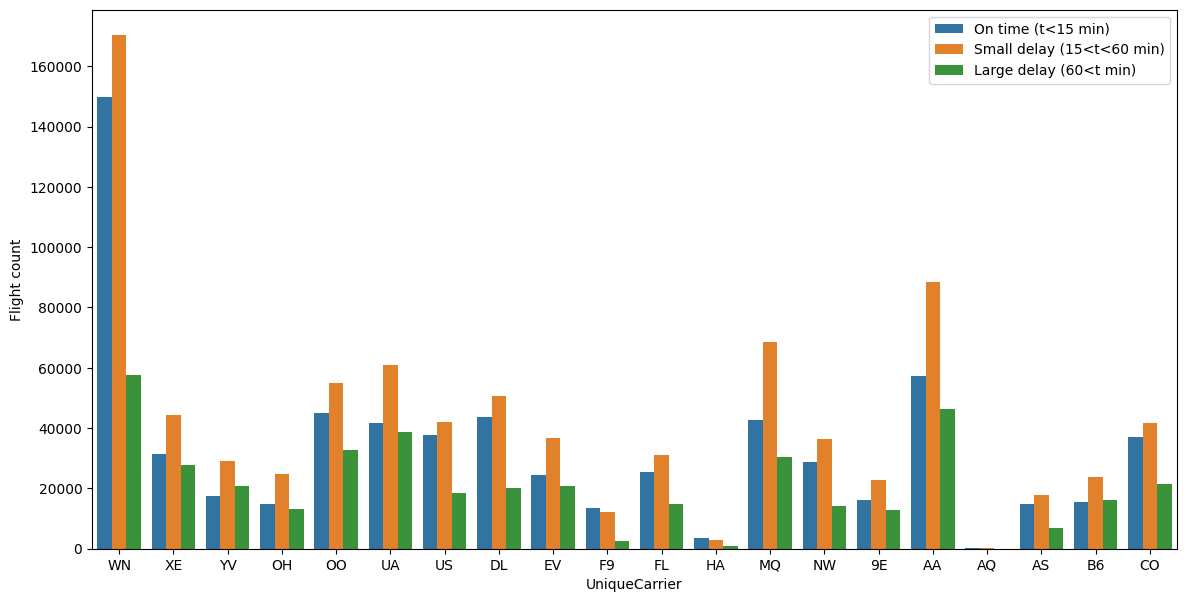

In [8]:
# Create Lambda expression for sorting Delay Type into different length categories
delay_type= lambda x:((0,1)[x>15],2)[x>60]
Flights['DelayLevel'] = Flights['DepDelay'].apply(delay_type)
fig = plt.figure(1, figsize=(14,7))
ax = sns.countplot(data = Flights, x='UniqueCarrier', hue='DelayLevel')
plt.ylabel('Flight count')

# Create Legend for Hue Colours
L= plt.legend()
L.get_texts()[0].set_text('On time (t<15 min)')
L.get_texts()[1].set_text('Small delay (15<t<60 min)')
L.get_texts()[2].set_text('Large delay (60<t min)')
plt.show()

# This graph displays the count of different delay lengths from each airline


# 2. Prediction
## Pre-Processing



In [9]:
# Normalize the data and use one-hot encoding for categorical variable features, UniqueCarrier, Origin, and CancellationCode.
categorical_columns = ['UniqueCarrier', 'Origin']

# Perform one-hot encoding on selected columns
Flights_encoded = pd.get_dummies(Flights_reg, columns=categorical_columns, prefix=categorical_columns)

# Print the first few rows of the encoded DataFrame to verify the result
print(Flights_encoded.head())

# Drop logically irrelavent features:
columns_to_drop = ['TailNum', 'Dest', 'CancellationCode']
Flights_encoded = Flights_encoded.drop(columns_to_drop, axis=1)

# Seperate target variable column from dataset
y_reg = Flights_encoded["DepDelay"]
X_reg = Flights_encoded.drop("DepDelay", axis=1)

# Normalize the features to zero mean and unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)



    Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
3       1           3          4   1829.0        1755   1959.0        1925   
5       1           3          4   1937.0        1830   2037.0        1940   
7       1           3          4   1644.0        1510   1845.0        1725   
9       1           3          4   1452.0        1425   1640.0        1625   
11      1           3          4   1323.0        1255   1526.0        1510   

    FlightNum TailNum  ActualElapsedTime  ...  Origin_TYR  Origin_TYS  \
3        3920  N464WN               90.0  ...           0           0   
5         509  N763SW              240.0  ...           0           0   
7        1333  N334SW              121.0  ...           0           0   
9         675  N286WN              228.0  ...           0           0   
11          4  N674AA              123.0  ...           0           0   

    Origin_VLD  Origin_VPS Origin_WRG  Origin_WYS  Origin_XNA  Origin_YAK  \
3            0 

## Training the models

1. Linear Regression. 
i) Univariate Regression
ii) Multivariate Regression
iii) Polynomial Regression

In [ ]:
# Import Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Split data 80/20 into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_reg, test_size=0.4, random_state=3)

# Fit PCA on the training data only
pca = PCA(n_components=0.90, random_state=42)
pca.fit(X_train)

# Transform both the training and test data using the fitted PCA object
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


name = "Univariate Regression"
lr = LinearRegression()

# Train and evaluate your model using the transformed data
lr.fit(X_train_pca, y_train)
score = lr.score(X_test_pca, y_test)

print(lr.intercept_)
print(lr.coef_)

# # Use 10-fold cross-validation to evaluate the model's performance
# scores = cross_val_score(lr, X_train, y_train, cv=10)

# # Print the cross-validation scores and the mean score
# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", np.mean(scores))

# # Evaluate the model's performance on the test data
# test_score = lr.score(X_test, y_test)
# print("Test score:", test_score)




# print(cv_results)
# print(-cv_results.mean())

# print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))



# # Set up models and cross-validation
# models = []
# models.append(('Univariate Regression', LinearRegression()))
# models.append(('Multivariate Regression', LinearRegression()))

# # Evaluate each model using cross-validation
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits=10, random_state=42, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
#     results.append(cv_results)
#     names.append(name)
#     print('%s: %f (%f)' % (name, -cv_results.mean(), cv_results.std()))

# # Fit and evaluate the best model on the test set
# best_model = models[np.argmax(results)][1]
# best_model.fit(X_train, y_train)
# test_error = -best_model.score(X_test, y_test)
# print('Test set error: %f' % test_error)


Sources:

https://financialpost.com/pmn/business-pmn/u-s-senator-seeks-full-accounting-of-southwest-airlines-meltdown-refunds-2